# Module imports

In [1]:
import ROOT as r
import math
from array import array
import numpy as np
import thread
import matplotlib as mp

Welcome to JupyROOT 6.08/02


# Set Canvas style

In [2]:
def setCanvasStyle():
    r.gStyle.SetOptStat(0);
    r.gStyle.SetOptFit(0);
    r.gStyle.SetOptTitle(1);
    r.gStyle.SetStatX(1);
    r.gStyle.SetStatY(1);
    r.gStyle.SetStatH(0.1);
    r.gStyle.SetStatW(0.15);
    r.gPad.SetTicks(1);
    c.SetLeftMargin(0.15);
    c.SetRightMargin(0.05);
    c.SetTopMargin(0.055);
    c.SetBottomMargin(0.15);

In [3]:
c = r.TCanvas('c1','c1',900,600)
setCanvasStyle()

# Retrieve and plot histogram from ROOT file

In [4]:
filename = '9d.root'
inFile = '~/pythonFourier/root/' + filename
outFile = '~/pythonFourier/root/frs_' + filename
file = r.TFile(inFile)
signal = file.Get('FastRotation/mergedCalo_intensitySpectrum')
signal.Rebin(1)
outFile = r.TFile(outFile,'RECREATE')

# Constant definition

In [5]:
nBins = signal.GetXaxis().GetNbins() # number of bins of original histogram
rebinConst = 5
startTime = 4 # in micro-sec
maxTime = 700 # of the original histogram in micro-sec
startFitTime = 30 # in micro-sec
endFitTime = 400 # in micro-sec
pi = math.pi
speedOfLight = 299792458 #speed of light [m/s]

# Set Histogram style

In [6]:
def setHistogramStyle():            
    signal.GetXaxis().CenterTitle();
    signal.GetXaxis().SetTitle('Time [#mus]');    
    signal.GetYaxis().CenterTitle();
    signal.GetYaxis().SetTitle('Intensity');        
    signal.SetTitle('');
    signal.GetXaxis().SetTitleOffset(1.4);
    signal.GetYaxis().SetTitleOffset(1.4);
    signal.GetXaxis().SetTitleSize(0.055);
    signal.GetXaxis().SetLabelSize(0.05);
    signal.GetYaxis().SetTitleSize(0.055);
    signal.GetYaxis().SetLabelSize(0.05);
    signal.SetLineColor(4)

Info in <TCanvas::Print>: eps file Signal1.eps has been created


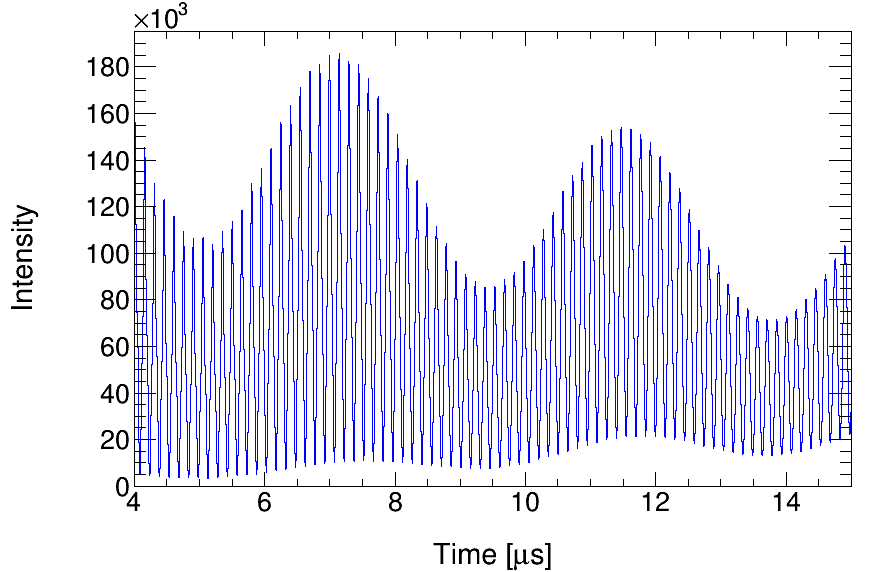

In [7]:
setHistogramStyle()
signal.Draw()
signal.GetXaxis().SetRangeUser(startTime,startTime+11)
c.Draw()   
c.Print("Signal1.eps")

Info in <TCanvas::Print>: eps file Signal2.eps has been created


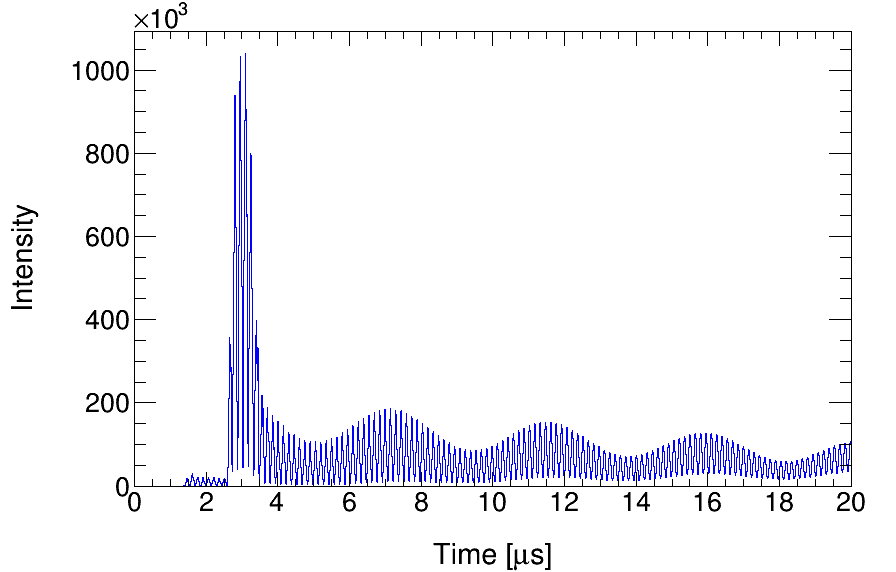

In [8]:
signal.Draw()
signal.GetXaxis().SetRangeUser(0,20)
c.Draw()   
c.Print("Signal2.eps")

Info in <TCanvas::Print>: eps file Signal3.eps has been created


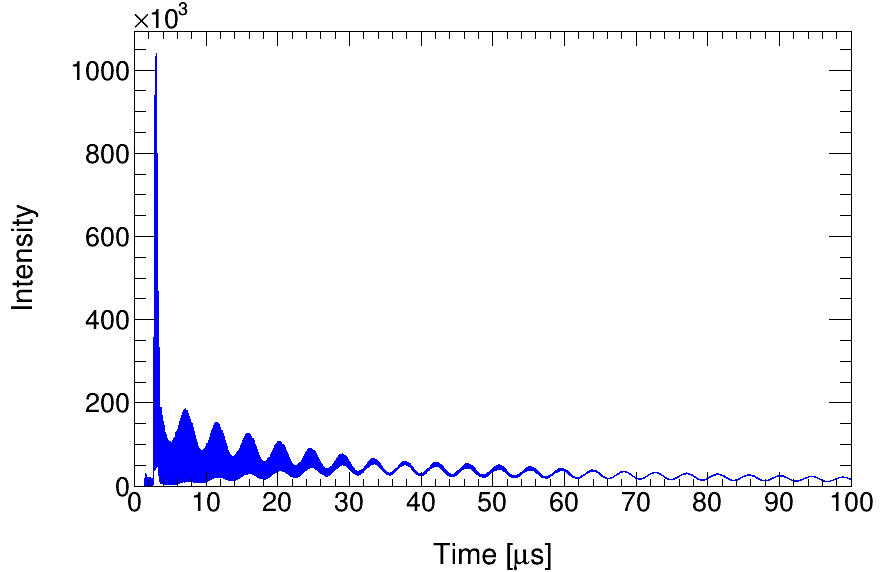

In [9]:
signal.Draw()
signal.GetXaxis().SetRangeUser(0,100)
c.Draw()   
c.Print("Signal3.eps")

Info in <TCanvas::Print>: eps file Signal4.eps has been created


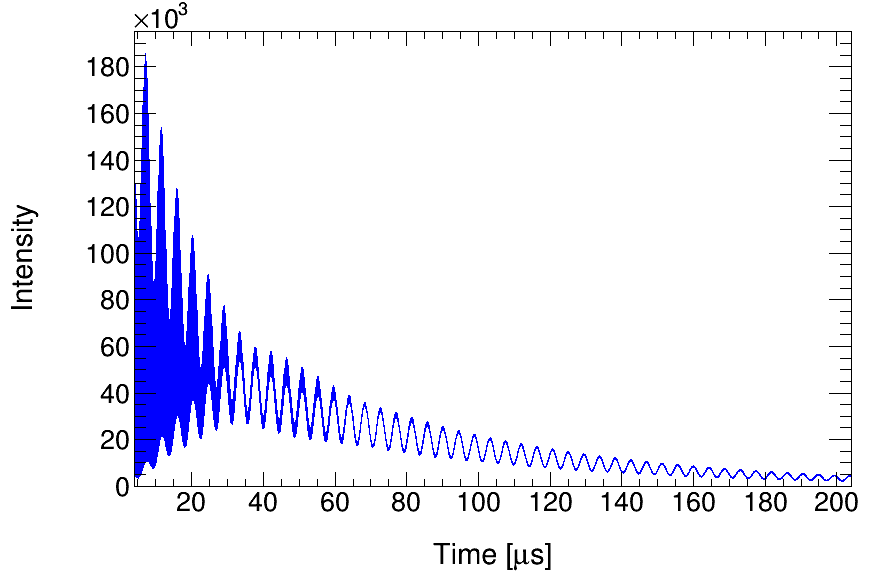

In [10]:
signal.Draw()
signal.GetXaxis().SetRangeUser(startTime,startTime+200)
c.Draw()   
c.Print("Signal4.eps")

# Rebin and plot histogram

Info in <TCanvas::Print>: eps file WigglePlot.eps has been created


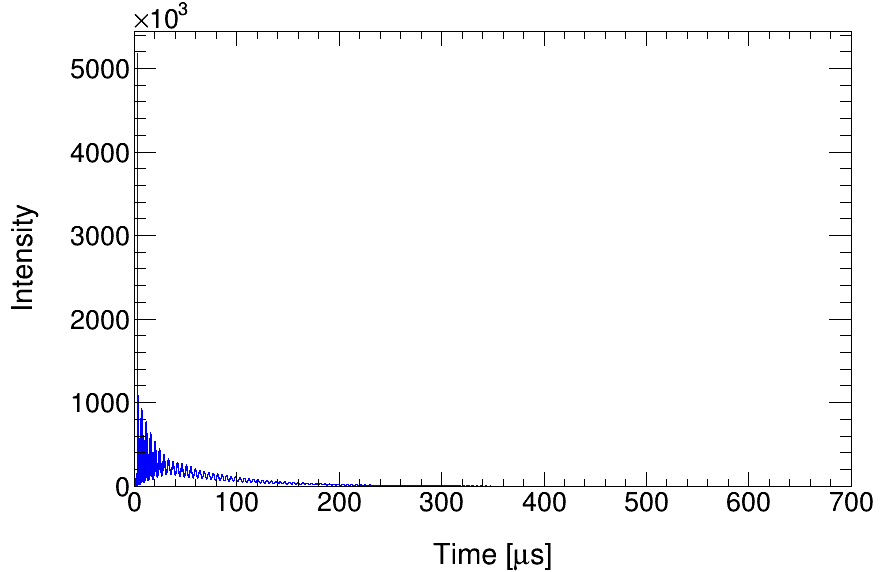

In [11]:
fr = signal.Clone()
signal.Rebin(rebinConst)
signal.Draw()
signal.GetXaxis().SetRangeUser(0,700)
signal.Write("rebinnedMergedFRS")
c.Draw()
c.Print("WigglePlot.eps")

382607

Info in <TCanvas::Print>: eps file FittedWigglePlot.eps has been created


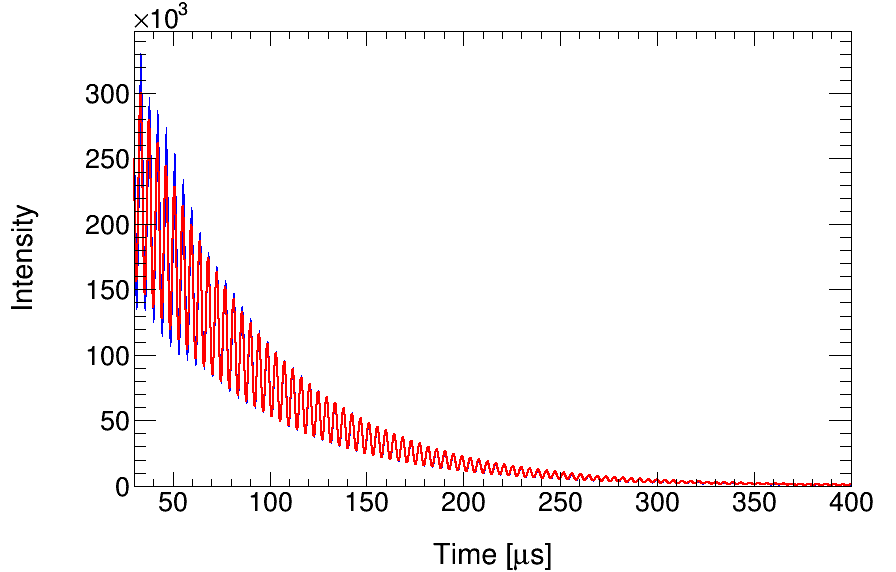

In [12]:
fit = r.TF1("fit","[0]*exp(-x/[1])*(1+[2]*cos(2*TMath::Pi()*[3]*x+[4]))",startFitTime,endFitTime)
fit.SetParameters(2000000,64.4,0.4,0.227,1)
fit.SetNpx(10000)
signal.Fit("fit","SREMQ")
signal.GetXaxis().SetRangeUser(startFitTime,endFitTime)
signal.Draw()
c.Draw()
c.Print("FittedWigglePlot.eps")
signal.Draw()
signal.Write("wigglePlot")

Info in <TCanvas::Print>: eps file FittedWigglePlotHistogram.eps has been created


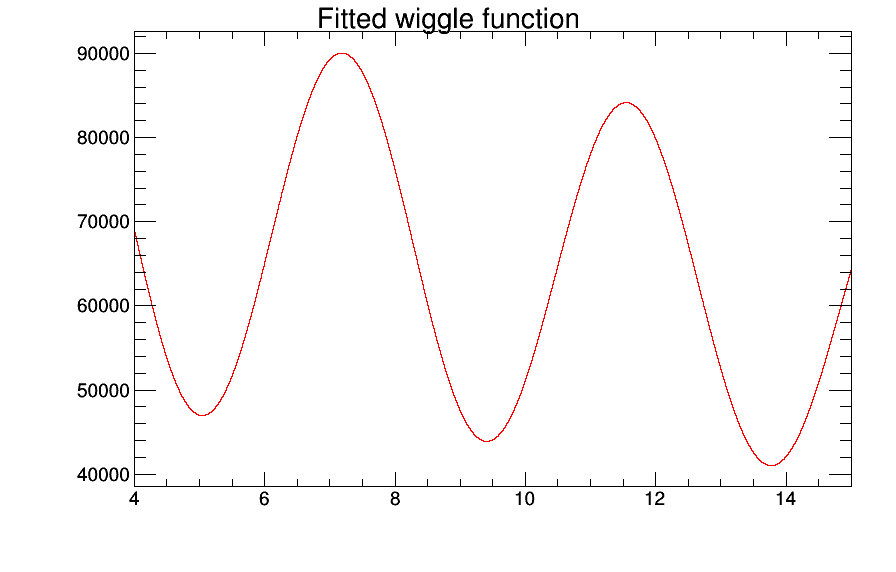

In [13]:
norm = r.TH1D("norm","norm",nBins,0,maxTime)

for i in range(nBins):
    norm.SetBinContent(i,fit.Eval(norm.GetBinCenter(i))/rebinConst)
    
c.Draw()

norm.SetLineColor(2)
norm.GetXaxis().SetRangeUser(4,15)
norm.SetTitle('Fitted wiggle function')
norm.Draw()
norm.Write("wiggleFunction")
c.Print("FittedWigglePlotHistogram.eps")

Info in <TCanvas::Print>: eps file FastRotationSmallRange.eps has been created


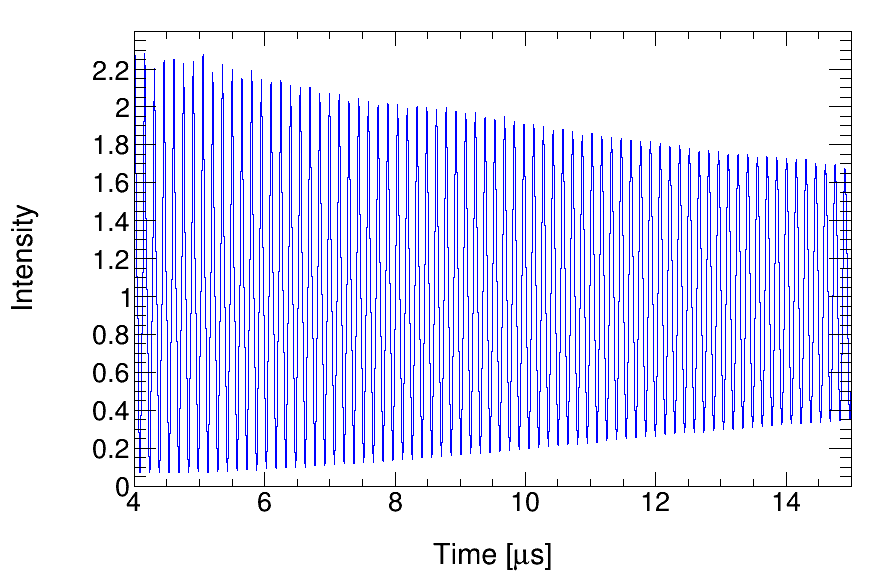

In [14]:
fr.Divide(norm)
fr.GetXaxis().SetRangeUser(4,15)
#fr.SetTitle("Fast Rotation signal")
fr.Draw()
fr.Write("fr")
c.Draw()
c.Print("FastRotationSmallRange.eps")

Info in <TCanvas::Print>: eps file FastRotationFullRange.eps has been created
Info in <TCanvas::Print>: png file FastRotationFullRange.png has been created


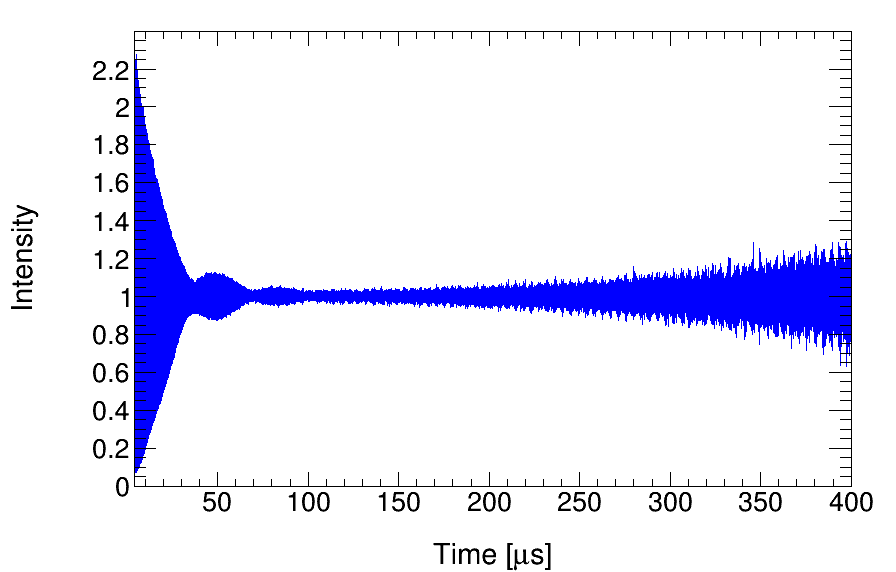

In [15]:
fr.GetXaxis().SetRangeUser(4, 400)
fr.Draw()
c.Draw()
c.Print("FastRotationFullRange.eps")
c.Print("FastRotationFullRange.png")

In [16]:
outFile.Close()